In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
training = pd.read_csv('Telecom.csv', sep=";")
trainingcopy = pd.read_csv('Telecom.csv', sep=";")

## 1. Data Integration

In [ ]:
#Criar cópia do dataset original
trainingcopy

,customerID,age,income,gender,monthlyCharges,paperlessBilling,dependents,phoneService,internetService,TVService,price,contract,productOfferings,promotions
0,0,37,1655,Female,20,Yes,Yes,1,5,5,5,4,3,2
1,1,56,3807,Female,20,Yes,No,4,4,4,4,4,2,4
2,2,44,205,Female,20,Yes,No,5,1,1,4,1,1,1
3,3,55,323,Male,50,Yes,No,5,4,4,5,4,4,4
4,4,29,1081,Male,109,Yes,Yes,4,3,3,3,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24060,24060,49,1007,Female,31,Yes,No,3,3,3,3,3,3,3
24061,24061,40,2688,Male,53,Yes,No,4,4,3,3,3,3,3
24062,24062,26,2287,Male,20,No,No,5,2,2,2,3,3,2
24063,24063,36,2400,Male,20,Yes,No,4,2,4,2,2,5,2


In [ ]:
trainingcopy.set_index('customerID', inplace = True)

In [ ]:
# ver se há customersIDs duplicados e só depois transformar em index
lista = training['customerID']
set_i = set(lista)
contains_duplicates = len(lista) != len(set_i)
print(contains_duplicates)

False


In [ ]:
training.set_index('customerID', inplace = True)

## 2. Exploration

In [ ]:
# Variáveis numéricas
training.select_dtypes('number').columns

Index(['age', 'income', 'monthlyCharges', 'phoneService', 'internetService',
       'TVService', 'price', 'contract', 'productOfferings', 'promotions'],
      dtype='object')

In [ ]:
training.describe()

,age,income,monthlyCharges,phoneService,internetService,TVService,price,contract,productOfferings,promotions
count,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000
mean,41.359235,1972.182506,34.440100,3.498857,2.848992,3.407397,2.861542,2.997673,3.262248,2.978267
std,13.600715,1040.528540,37.656329,1.286925,1.395001,1.334944,1.436931,1.304049,1.321115,1.519319
min,7.000000,51.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,1325.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,41.000000,1914.000000,20.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000
75%,52.000000,2544.000000,32.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,85.000000,6948.000000,1325.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
training.info()
#paperlessBilling - 8 NaN / dependents - 173 NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24065 entries, 0 to 24064
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               24065 non-null  int64 
 1   income            24065 non-null  int64 
 2   gender            24065 non-null  object
 3   monthlyCharges    24065 non-null  int64 
 4   paperlessBilling  24057 non-null  object
 5   dependents        23892 non-null  object
 6   phoneService      24065 non-null  int64 
 7   internetService   24065 non-null  int64 
 8   TVService         24065 non-null  int64 
 9   price             24065 non-null  int64 
 10  contract          24065 non-null  int64 
 11  productOfferings  24065 non-null  int64 
 12  promotions        24065 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 2.6+ MB


In [ ]:
training.dtypes

age                  int64
income               int64
gender              object
monthlyCharges       int64
paperlessBilling    object
dependents          object
phoneService         int64
internetService      int64
TVService            int64
price                int64
contract             int64
productOfferings     int64
promotions           int64
dtype: object

### 2.1. Check missing values

In [ ]:
training.isna().any() # paperlessBilling e dependents têm missing values

age                 False
income              False
gender              False
monthlyCharges      False
paperlessBilling     True
dependents           True
phoneService        False
internetService     False
TVService           False
price               False
contract            False
productOfferings    False
promotions          False
dtype: bool

### 2.2. Check incoherence

In [ ]:
training['gender'].value_counts()
training['paperlessBilling'].value_counts()
training['dependents'].value_counts()

No     17256
Yes     6636
Name: dependents, dtype: int64

In [ ]:
training['age'].min() # idade mínima: 7 anos
training['income'].min() # salário mínimo: 51
training[training['age'] < 18] # 101 pessoas - 0.42%
training[training['income'] < 300] # 967 pessoas - 4%
training[training['monthlyCharges'] > 500] # 10 pessoas - 0.04%

,age,income,gender,monthlyCharges,paperlessBilling,dependents,phoneService,internetService,TVService,price,contract,productOfferings,promotions
customerID,,,,,,,,,,,,,
2273,26,3894,Female,513,Yes,No,4,4,5,4,4,5,4
7666,69,1885,Male,585,Yes,No,4,2,2,2,2,1,2
12175,30,4124,Female,768,Yes,No,4,2,2,3,1,2,1
13049,18,2558,Female,615,Yes,No,5,5,4,5,5,4,5
13207,32,4425,Male,1325,Yes,No,5,2,5,2,2,5,2
14817,46,4207,Male,550,Yes,No,5,3,4,3,3,4,3
17700,45,2460,Female,814,Yes,Yes,4,1,5,1,1,1,4
19872,47,5091,Female,601,Yes,No,4,1,4,1,1,5,1
20112,30,3307,Male,620,Yes,No,2,3,5,3,3,5,3


In [ ]:
# verificar se os números estão entre 0-5
training['phoneService'].value_counts()
training['internetService'].value_counts()
training['TVService'].value_counts()
training['price'].value_counts()
training['contract'].value_counts()
training['productOfferings'].value_counts()
training['promotions'].value_counts()

4    5464
5    4839
3    4395
2    4308
1    3820
0    1239
Name: promotions, dtype: int64

### 2.3. Check outliers

trainingcopy - Treatment

In [ ]:
trainingcopy["monthlyCharges"] = np.where(trainingcopy["monthlyCharges"] > 250, 250,trainingcopy['monthlyCharges'])
sns.boxplot(x='monthlyCharges', data = trainingcopy)

In [ ]:
trainingcopy[trainingcopy['monthlyCharges'] > 250].count()

training - Treatment

<AxesSubplot:xlabel='income'>

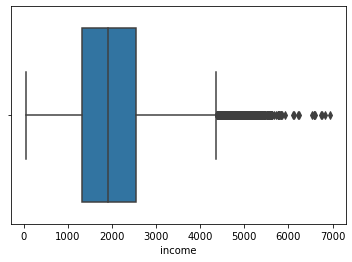

In [ ]:
sns.boxplot(x='income', data = training)

<AxesSubplot:xlabel='monthlyCharges'>

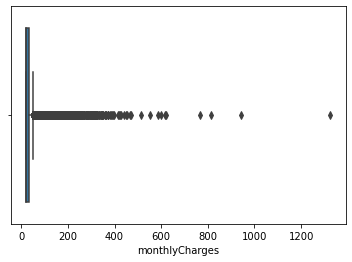

In [ ]:
sns.boxplot(x='monthlyCharges', data = training)

<AxesSubplot:xlabel='age'>

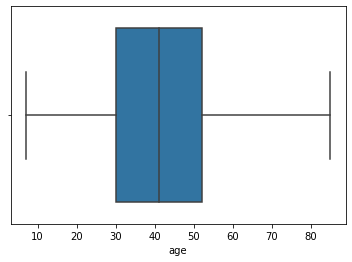

In [ ]:
sns.boxplot(x='age', data = training)

In [ ]:
# Máximos: procurar valores superiores aos extremos calculados
training[training['age'] > 85].count() # 0 obs = 0% das obs
training[training['income'] > 4372.5].count() # 472 obs = 1.96% das obs
training[training['monthlyCharges'] > 250].count() # 3313 obs = 13.76% das obs, 3286 dependents

age                 114
income              114
gender              114
monthlyCharges      114
paperlessBilling    114
dependents          113
phoneService        114
internetService     114
TVService           114
price               114
contract            114
productOfferings    114
promotions          114
dtype: int64

In [ ]:
training.groupby('internetService')['income'].mean()

internetService
0    1855.759907
1    2055.793785
2    2006.863404
3    2031.681159
4    1890.730733
5    1883.075081
Name: income, dtype: float64

In [ ]:
training.groupby('gender')['income'].mean()

gender
Female    1847.137728
Male      2101.336290
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='monthlyCharges'>

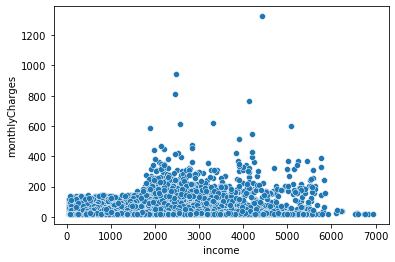

In [ ]:
sns.scatterplot(x = 'income', y = 'monthlyCharges', data = training)

## 3.Visual Exploration

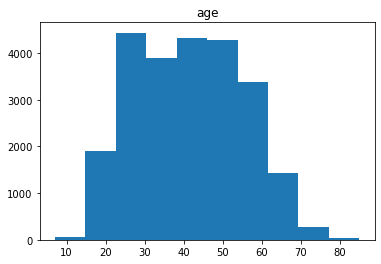

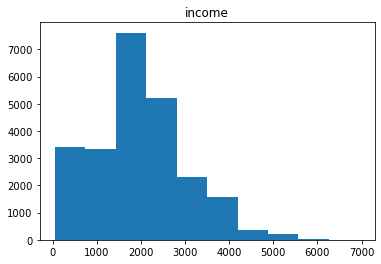

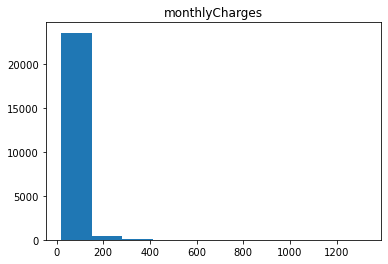

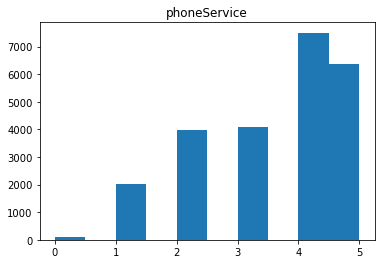

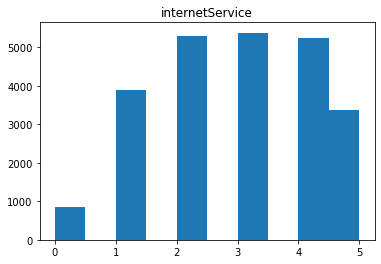

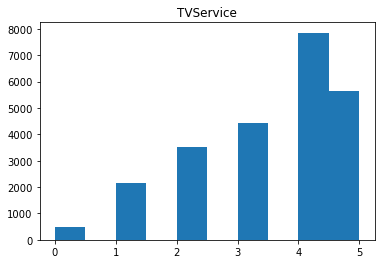

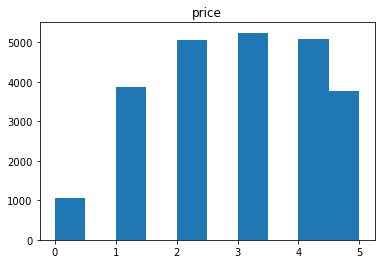

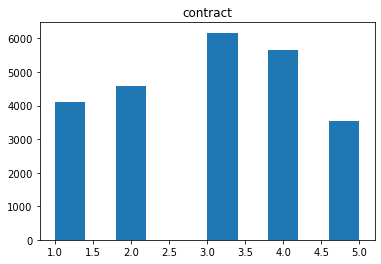

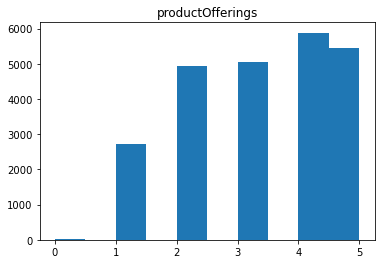

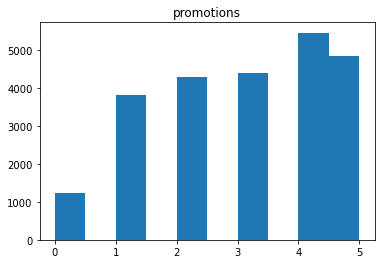

In [ ]:
numerical_df = training[['age', 'income', 'monthlyCharges', 'phoneService', 'internetService',
       'TVService', 'price', 'contract', 'productOfferings', 'promotions']]
categorical_df = training[['gender', 'paperlessBilling', 'dependents']]

for i in numerical_df.columns:
    plt.hist(numerical_df[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

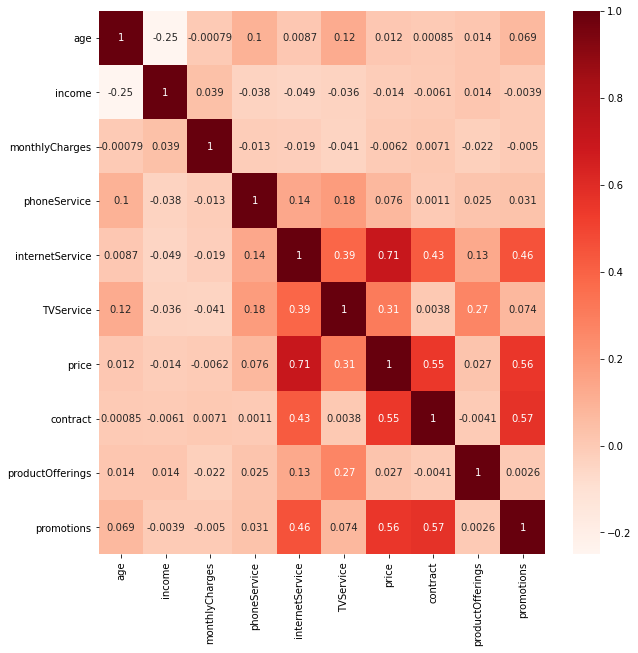

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(training.corr(method='spearman'), annot=True, cmap=plt.cm.Reds)

## 4. Data Preparation

### 4.1. Fix outliers

<AxesSubplot:xlabel='age'>

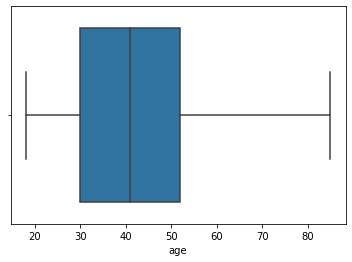

In [ ]:
training['age'] = np.where(training['age'] < 18, 18,training['age'])
sns.boxplot(x='age', data = training)

<AxesSubplot:xlabel='monthlyCharges'>

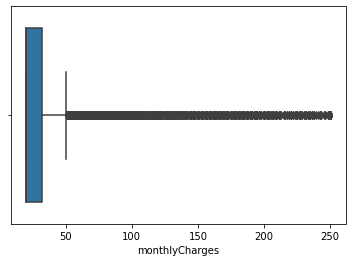

In [ ]:
training["monthlyCharges"] = np.where(training["monthlyCharges"] > 250, 250,training['monthlyCharges'])
sns.boxplot(x='monthlyCharges', data = training)

Text(0.5, 1.0, 'Original Data')

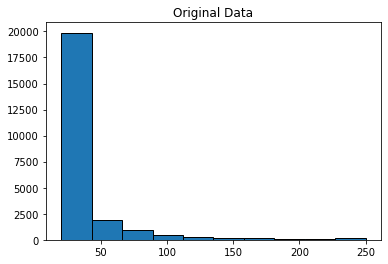

In [ ]:
# Histogram before log transformation
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.hist(training['monthlyCharges'], edgecolor='black')
axs.set_title('Original Data')

In [ ]:
training['monthlyCharges'] = np.log(training['monthlyCharges'])

Text(0.5, 1.0, 'Original Data')

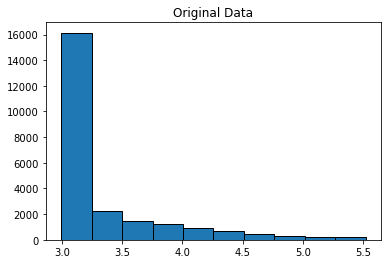

In [ ]:
# Histogram after log transformation
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.hist(training['monthlyCharges'], edgecolor='black')
axs.set_title('Original Data')

<AxesSubplot:xlabel='monthlyCharges'>

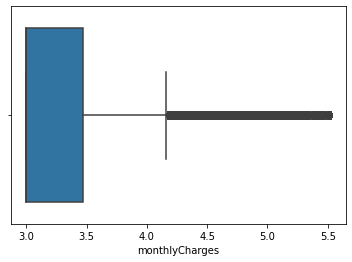

In [ ]:
sns.boxplot(x='monthlyCharges', data = training)

### 4.2. Imputation on missing values

In [ ]:
training['paperlessBilling'] = training['paperlessBilling'].replace(np.nan, training['paperlessBilling'].value_counts().idxmax())

In [ ]:
training['dependents'] = training['dependents'].replace(np.nan, training['dependents'].value_counts().idxmax())

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24065 entries, 0 to 24064
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               24065 non-null  int64  
 1   income            24065 non-null  int64  
 2   gender            24065 non-null  object 
 3   monthlyCharges    24065 non-null  float64
 4   paperlessBilling  24065 non-null  object 
 5   dependents        24065 non-null  object 
 6   phoneService      24065 non-null  int64  
 7   internetService   24065 non-null  int64  
 8   TVService         24065 non-null  int64  
 9   price             24065 non-null  int64  
 10  contract          24065 non-null  int64  
 11  productOfferings  24065 non-null  int64  
 12  promotions        24065 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 2.6+ MB


### 4.3. Create dummies

In [ ]:
dummy = pd.get_dummies(training, drop_first = True)
dummy.head(9)

,age,income,monthlyCharges,phoneService,internetService,TVService,price,contract,productOfferings,promotions,gender_Male,paperlessBilling_Yes,dependents_Yes
customerID,,,,,,,,,,,,,
0,37,1655,2.995732,1,5,5,5,4,3,2,0,1,1
1,56,3807,2.995732,4,4,4,4,4,2,4,0,1,0
2,44,205,2.995732,5,1,1,4,1,1,1,0,1,0
3,55,323,3.912023,5,4,4,5,4,4,4,1,1,0
4,29,1081,4.691348,4,3,3,3,1,3,4,1,1,1
5,32,2439,2.995732,4,3,3,1,1,3,1,1,1,0
6,41,2162,2.995732,3,5,5,4,4,5,4,0,1,0
7,60,428,3.178054,3,4,4,4,4,4,4,0,1,0
8,26,4099,2.995732,5,1,4,1,1,5,1,0,1,1


### 4.4. Scale the data

#### 4.4.1 MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

finalData = dummy.copy()

minmax_scaler = MinMaxScaler()

In [ ]:
scale = minmax_scaler.fit(finalData)

In [ ]:
minmax_data = scale.transform(finalData)

In [ ]:
minmax_data = pd.DataFrame(minmax_data, columns = finalData.columns, index=dummy.index)
minmax_data.head(10)

,age,income,monthlyCharges,phoneService,internetService,TVService,price,contract,productOfferings,promotions,gender_Male,paperlessBilling_Yes,dependents_Yes
customerID,,,,,,,,,,,,,
0,0.283582,0.232565,0.000000,0.2,1.0,1.0,1.0,0.75,0.6,0.4,0.0,1.0,1.0
1,0.567164,0.544585,0.000000,0.8,0.8,0.8,0.8,0.75,0.4,0.8,0.0,1.0,0.0
2,0.388060,0.022329,0.000000,1.0,0.2,0.2,0.8,0.00,0.2,0.2,0.0,1.0,0.0
3,0.552239,0.039437,0.362783,1.0,0.8,0.8,1.0,0.75,0.8,0.8,1.0,1.0,0.0
4,0.164179,0.149340,0.671337,0.8,0.6,0.6,0.6,0.00,0.6,0.8,1.0,1.0,1.0
5,0.208955,0.346237,0.000000,0.8,0.6,0.6,0.2,0.00,0.6,0.2,1.0,1.0,0.0
6,0.343284,0.306075,0.000000,0.6,1.0,1.0,0.8,0.75,1.0,0.8,0.0,1.0,0.0
7,0.626866,0.054661,0.072186,0.6,0.8,0.8,0.8,0.75,0.8,0.8,0.0,1.0,0.0
8,0.119403,0.586922,0.000000,1.0,0.2,0.8,0.2,0.00,1.0,0.2,0.0,1.0,1.0


#### Rob Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

finalData = dummy.copy()

rob_scaler = RobustScaler().fit(finalData)

rob_data = rob_scaler.transform(finalData)

rob_data = pd.DataFrame(minmax_data, columns = finalData.columns, index=dummy.index)

# 5. Clustering

### Perspectives

#### PRODUCT SATISFACTION:
phoneService | internetService | TVService | contract | productOfferings | price | promotions

In [ ]:
data= minmax_data.copy()

data_prod = data[['phoneService','internetService','TVService','price','contract', 'productOfferings', 'promotions']].copy()
data_prod

,phoneService,internetService,TVService,price,contract,productOfferings,promotions
customerID,,,,,,,
0,0.2,1.0,1.0,1.0,0.75,0.6,0.4
1,0.8,0.8,0.8,0.8,0.75,0.4,0.8
2,1.0,0.2,0.2,0.8,0.00,0.2,0.2
3,1.0,0.8,0.8,1.0,0.75,0.8,0.8
4,0.8,0.6,0.6,0.6,0.00,0.6,0.8
...,...,...,...,...,...,...,...
24060,0.6,0.6,0.6,0.6,0.50,0.6,0.6
24061,0.8,0.8,0.6,0.6,0.50,0.6,0.6
24062,1.0,0.4,0.4,0.4,0.50,0.6,0.4


#### CUSTOMER INFORMATION:
age | income | monthlyCharges | gender_Male | paperlessBilling_Yes | dependents_Yes

In [ ]:
data_cust = data[['age', 'income', 'monthlyCharges', 'gender_Male', 'paperlessBilling_Yes', 'dependents_Yes']].copy()
data_cust

,age,income,monthlyCharges,gender_Male,paperlessBilling_Yes,dependents_Yes
customerID,,,,,,
0,0.283582,0.232565,0.000000,0.0,1.0,1.0
1,0.567164,0.544585,0.000000,0.0,1.0,0.0
2,0.388060,0.022329,0.000000,0.0,1.0,0.0
3,0.552239,0.039437,0.362783,1.0,1.0,0.0
4,0.164179,0.149340,0.671337,1.0,1.0,1.0
...,...,...,...,...,...,...
24060,0.462687,0.138611,0.173516,0.0,1.0,0.0
24061,0.328358,0.382340,0.385853,1.0,1.0,0.0
24062,0.119403,0.324199,0.000000,1.0,0.0,0.0


## 5.1. K-Means

In [ ]:
from sklearn.cluster import KMeans

## 5.1.1 PRODUCT SATISFACTION

### Elbow Method

In [ ]:
data_prod_1 = data_prod.copy()

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model_prod = KMeans(n_clusters=k)

    # Fit model to samples
    model_prod.fit(data_prod_1)

    # Append the inertia to the list of inertias
    inertias.append(model_prod.inertia_)

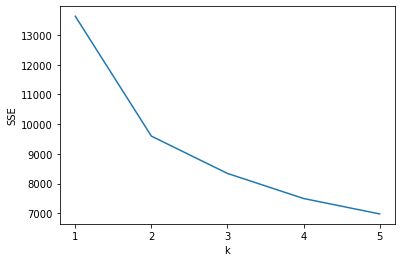

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

O número ótimo de clusters parece estar entre o 2 e 3, pois é neste ponto onde o SSE começa a decrescer mais lentamente.

### Dendogram - Hierachical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
hclustering = linkage(data_prod, 'ward')

# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

2 é o melhor número de clusters

In [ ]:
# Entre Ward, Complete e Average, o Ward mostrou melhores resultados
#hclustering = linkage(data_prod, 'complete')

# define the title of the plot
#plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
#plt.xlabel('Observations')
# define the label for y axis
#plt.ylabel('Distance')

# Draw the dendogram
#dendrogram(
 #   hclustering,
  #  truncate_mode='lastp',  # truncation is used to condense the dendrogram
   # p=12,                   # p parameter for truncate_mode
  #  show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
  #  leaf_rotation=90.,
  #  leaf_font_size=12.,
  #  show_contracted=True,
#)
#plt.show()

In [ ]:
#hclustering = linkage(data_prod, 'average')

# define the title of the plot
#plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
#plt.xlabel('Observations')
# define the label for y axis
#plt.ylabel('Distance')

# Draw the dendogram
#dendrogram(
 #   hclustering,
 #   truncate_mode='lastp',  # truncation is used to condense the dendrogram
 #   p=12,                   # p parameter for truncate_mode
 #   show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
 #   leaf_rotation=90.,
 #   leaf_font_size=12.,
 #   show_contracted=True,
#)
#plt.show()

### Applying K-Means

In [ ]:
model_prod = KMeans(n_clusters=2)
model_prod.fit(data_prod_1)

KMeans(n_clusters=2)

In [ ]:
data_prod_1['label_p'] = model_prod.labels_
data_prod_1

,phoneService,internetService,TVService,price,contract,productOfferings,promotions,label_p
customerID,,,,,,,,
0,0.2,1.0,1.0,1.0,0.75,0.6,0.4,1
1,0.8,0.8,0.8,0.8,0.75,0.4,0.8,1
2,1.0,0.2,0.2,0.8,0.00,0.2,0.2,0
3,1.0,0.8,0.8,1.0,0.75,0.8,0.8,1
4,0.8,0.6,0.6,0.6,0.00,0.6,0.8,0
...,...,...,...,...,...,...,...,...
24060,0.6,0.6,0.6,0.6,0.50,0.6,0.6,1
24061,0.8,0.8,0.6,0.6,0.50,0.6,0.6,1
24062,1.0,0.4,0.4,0.4,0.50,0.6,0.4,0


In [ ]:
descr_1 = data_prod_1.groupby(['label_p']).describe().transpose()
descr_1

label_p                            0             1
phoneService     count  11827.000000  12238.000000
                 mean       0.667304      0.731149
                 std        0.267936      0.242678
                 min        0.000000      0.000000
                 25%        0.400000      0.600000
                 50%        0.800000      0.800000
                 75%        0.800000      1.000000
                 max        1.000000      1.000000
internetService  count  11827.000000  12238.000000
                 mean       0.381162      0.752100
                 std        0.221621      0.194885
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.400000      1.000000
                 max        1.000000      1.000000
TVService        count  11827.000000  12238.000000
                 mean       0.586962      0.772822
                 std        0.290213      0.204461
                 min        0.000000      0.000000
                 25%        0.400000      0.600000
                 50%        0.600000      0.800000
                 75%        0.800000      1.000000
                 max        1.000000      1.000000
price            count  11827.000000  12238.000000
                 mean       0.355525      0.781811
                 std        0.207007      0.178008
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.400000      1.000000
                 max        1.000000      1.000000
contract         count  11827.000000  12238.000000
                 mean       0.291917      0.699951
                 std        0.262644      0.245989
                 min        0.000000      0.000000
                 25%        0.000000      0.500000
                 50%        0.250000      0.750000
                 75%        0.500000      1.000000
                 max        1.000000      1.000000
productOfferings count  11827.000000  12238.000000
                 mean       0.632451      0.671776
                 std        0.269754      0.257303
                 min        0.000000      0.000000
                 25%        0.400000      0.400000
                 50%        0.600000      0.800000
                 75%        0.800000      0.800000
                 max        1.000000      1.000000
promotions       count  11827.000000  12238.000000
                 mean       0.402114      0.782693
                 std        0.261568      0.210389
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.600000      1.000000
                 max        1.000000      1.000000

Cluster 1 tem os clientes com os maiores níveis de satisfação média.
O desvio-padrão é bastante baixo em todas as variáveis portanto confirmamos que todos os clientes são homogéneos dentro de cada cluster.

### Results Visualization

In [ ]:
cluster0 = data_prod_1[data_prod_1.label_p==0]
cluster1 = data_prod_1[data_prod_1.label_p==1]

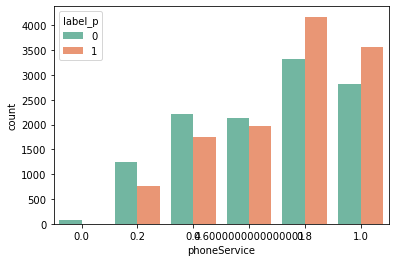

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# read a tips.csv file from seaborn library
df = data_prod_1.copy()

# count plot on two categorical variable
sns.countplot(x ='phoneService', hue = "label_p", data = df, palette='Set2')

# Show the plot
plt.show()

## 5.1.2 Customer Information

### Elbow Method

In [ ]:
#use data_cust copy
data_cust_1 = data_cust.copy()

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model_cust = KMeans(n_clusters=k)

    # Fit model to samples
    model_cust.fit(data_cust_1)

    # Append the inertia to the list of inertias
    inertias.append(model_cust.inertia_)

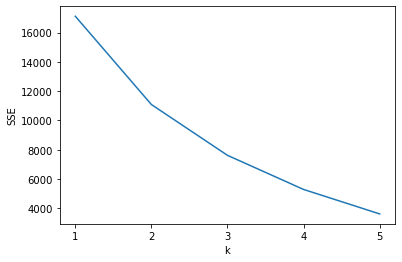

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

### Applying k-means

In [ ]:
model_cust = KMeans(n_clusters=3)
model_cust.fit(data_cust_1)

KMeans(n_clusters=3)

In [ ]:
data_cust_1['label_c'] = model_cust.labels_
data_cust_1

,age,income,monthlyCharges,gender_Male,paperlessBilling_Yes,dependents_Yes,label_c
customerID,,,,,,,
0,0.283582,0.232565,0.000000,0.0,1.0,1.0,1
1,0.567164,0.544585,0.000000,0.0,1.0,0.0,2
2,0.388060,0.022329,0.000000,0.0,1.0,0.0,2
3,0.552239,0.039437,0.362783,1.0,1.0,0.0,0
4,0.164179,0.149340,0.671337,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...
24060,0.462687,0.138611,0.173516,0.0,1.0,0.0,2
24061,0.328358,0.382340,0.385853,1.0,1.0,0.0,0
24062,0.119403,0.324199,0.000000,1.0,0.0,0.0,0


In [ ]:
descr_cust = data_cust_1.groupby(['label_c']).describe().transpose()
descr_cust

label_c                               0            1            2
age                  count  8521.000000  6636.000000  8908.000000
                     mean      0.337948     0.382097     0.334923
                     std       0.187973     0.230724     0.189638
                     min       0.000000     0.000000     0.000000
                     25%       0.179104     0.179104     0.164179
                     50%       0.328358     0.388060     0.328358
                     75%       0.477612     0.582090     0.477612
                     max       1.000000     0.776119     1.000000
income               count  8521.000000  6636.000000  8908.000000
                     mean      0.301407     0.242231     0.283751
                     std       0.153431     0.123789     0.161399
                     min       0.000000     0.000000     0.000145
                     25%       0.209076     0.159308     0.174967
                     50%       0.285921     0.247934     0.274612
                     75%       0.389300     0.316514     0.377120
                     max       0.945339     0.949253     1.000000
monthlyCharges       count  8521.000000  6636.000000  8908.000000
                     mean      0.129272     0.122188     0.129942
                     std       0.216687     0.210469     0.214034
                     min       0.000000     0.000000     0.000000
                     25%       0.000000     0.000000     0.000000
                     50%       0.000000     0.000000     0.000000
                     75%       0.186086     0.173516     0.198270
                     max       1.000000     1.000000     1.000000
gender_Male          count  8521.000000  6636.000000  8908.000000
                     mean      1.000000     0.499849     0.000000
                     std       0.000000     0.500038     0.000000
                     min       1.000000     0.000000     0.000000
                     25%       1.000000     0.000000     0.000000
                     50%       1.000000     0.000000     0.000000
                     75%       1.000000     1.000000     0.000000
                     max       1.000000     1.000000     0.000000
paperlessBilling_Yes count  8521.000000  6636.000000  8908.000000
                     mean      0.760357     0.996233     0.726538
                     std       0.426891     0.061267     0.445761
                     min       0.000000     0.000000     0.000000
                     25%       1.000000     1.000000     0.000000
                     50%       1.000000     1.000000     1.000000
                     75%       1.000000     1.000000     1.000000
                     max       1.000000     1.000000     1.000000
dependents_Yes       count  8521.000000  6636.000000  8908.000000
                     mean      0.000000     1.000000     0.000000
                     std       0.000000     0.000000     0.000000
                     min       0.000000     1.000000     0.000000
                     25%       0.000000     1.000000     0.000000
                     50%       0.000000     1.000000     0.000000
                     75%       0.000000     1.000000     0.000000
                     max       0.000000     1.000000     0.000000

### Results Visualization

In [ ]:
cluster0 = data_cust_1[data_cust_1.label_c==0]
cluster1 = data_cust_1[data_cust_1.label_c==1]

## 5.2. SOM

### 5.2.1 CUSTOMER INFORMATION

In [ ]:
import sompy
from sompy.sompy import SOMFactory

In [ ]:
data_cust_2 = data_cust.copy()
data_cust_21 = data_cust.copy()

In [ ]:
df_som = np.float32(data_cust_2.values)

In [ ]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [ ]:
# this will use the default parameters, but you can change the initialization and neighborhood methods
som = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [ ]:
# For more information about the trainig: verbose='info'
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

#### a) U-Matrix

In [ ]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

The dark blue areas define possible clusters (lower distance between neurons) while lighter/red areas correspond to larger distances.

#### b) Component Planes

In [ ]:
som.component_names = data_cust_2.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)
comp_planes.show(som, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

*__Note:__* Red represents higher values and Blue represents lower values.

With the component planes we can visualize the relative component distributions of the input data. Each square in this planes represents an unit of the SOM grid. In a component plane, each unit is coloured according to the weight of each variable in
the SOM.

In [ ]:
# Para ver apenas o component plane de uma variável:
comp_plane = sompy.mapview.View2DPacked(rows, cols, 'Component Plane',text_size=8)
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
comp_plane.show(som, what='codebook', which_dim=[1], cmap=None, col_sz=5) #which_dim='all' default
# v.save('2d_packed_test')

In [ ]:
bmus = som.project_data(df_som)
bmus

#### c) Option 1
2 clusters


In [ ]:
cl = som.cluster(n_clusters=2)

In [ ]:
labels = getattr(som, 'cluster_labels')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

C:\Users\Utilizador\anaconda3\lib\site-packages\sompy\visualization\mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


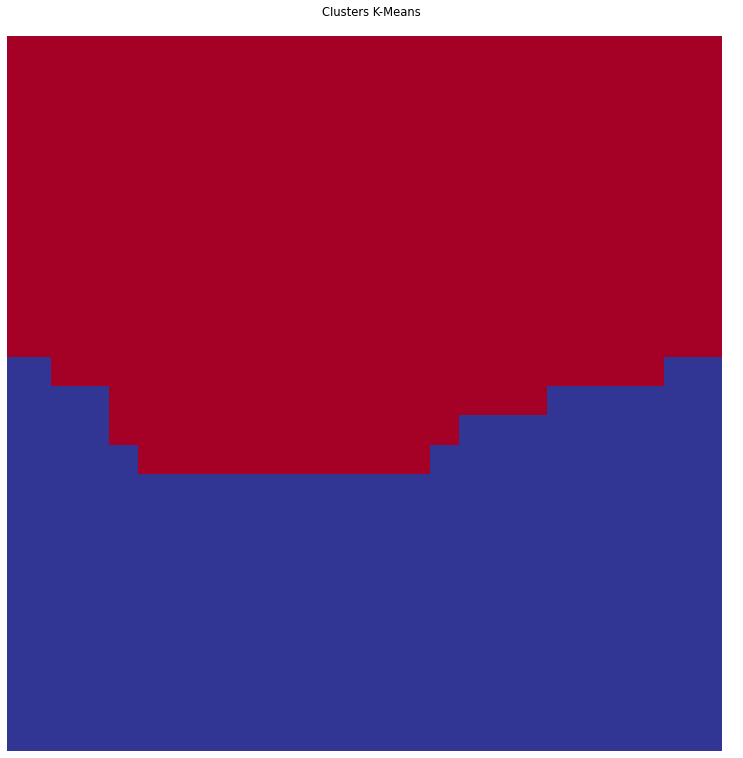

In [ ]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8)
v.show(som, what='cluster')

C:\Users\Utilizador\anaconda3\lib\site-packages\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


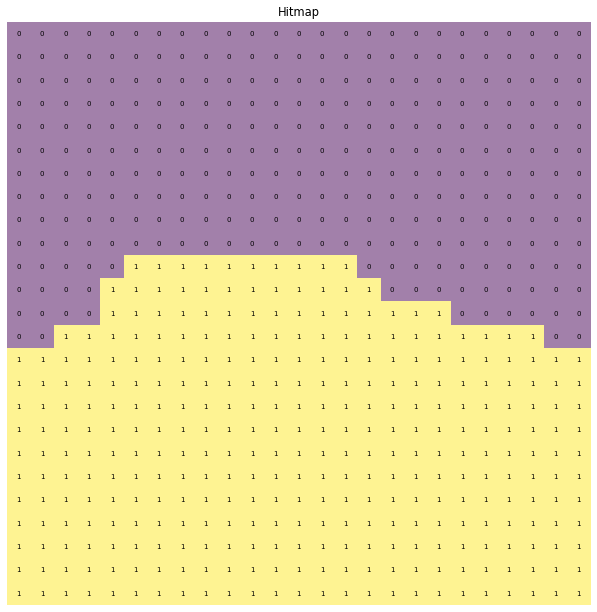

In [ ]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [ ]:
bmus = som.project_data(df_som)
data_cust_2['bmu'] = bmus

NameError: name 'df_som' is not defined

In [ ]:
data_cust_2['label_c'] = labels[data_cust_2['bmu']]
data_cust_2.head()

In [ ]:
df_final_som = data_cust_2.copy(deep=True)
df_final_som['label_c'] = data_cust_2['label_c']

In [ ]:
descr_3 = df_final_som.reset_index(drop=True)
descr_3 = descr_3.groupby(['label_c'])[['age', 'income', 'monthlyCharges', 'gender_Male', 'paperlessBilling_Yes', 'dependents_Yes']].describe().T
descr_3

#### d) Option 2
4 clusters

In [ ]:
rows = 2
cols = 2
mapsize = [rows, cols]

In [ ]:
# this will use the default parameters, but you can change the initialization and neighborhood methods
som_2 = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [ ]:
# For more information about the trainig: verbose='info'
som_2.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

In [ ]:
bmus_2 = som_2.project_data(df_som)
bmus_2

In [ ]:
data_cust_21['label_c'] = bmus_2

In [ ]:
data_cust_21

In [ ]:
descr_4 = data_cust_21.reset_index(drop=True)
descr_4 = descr_4.groupby(['label_c'])[['age', 'income', 'monthlyCharges', 'gender_Male', 'paperlessBilling_Yes', 'dependents_Yes']].describe().T
descr_4

### 5.2.2 PRODUCT SATISFACTION


In [ ]:
data_prod_2= data_prod.copy()
data_prod_2

,phoneService,internetService,TVService,price,contract,productOfferings,promotions
customerID,,,,,,,
0,0.2,1.0,1.0,1.0,0.75,0.6,0.4
1,0.8,0.8,0.8,0.8,0.75,0.4,0.8
2,1.0,0.2,0.2,0.8,0.00,0.2,0.2
3,1.0,0.8,0.8,1.0,0.75,0.8,0.8
4,0.8,0.6,0.6,0.6,0.00,0.6,0.8
...,...,...,...,...,...,...,...
24060,0.6,0.6,0.6,0.6,0.50,0.6,0.6
24061,0.8,0.8,0.6,0.6,0.50,0.6,0.6
24062,1.0,0.4,0.4,0.4,0.50,0.6,0.4


In [ ]:
df_som_2 = np.float32(data_prod_2.values)

In [ ]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [ ]:
# this will use the default parameters, but you can change the initialization and neighborhood methods
som = SOMFactory().build(df_som_2, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [ ]:
# For more information about the trainig: verbose='info'
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

#### a) U-Matrix

C:\Users\Utilizador\anaconda3\lib\site-packages\sompy\visualization\umatrix.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


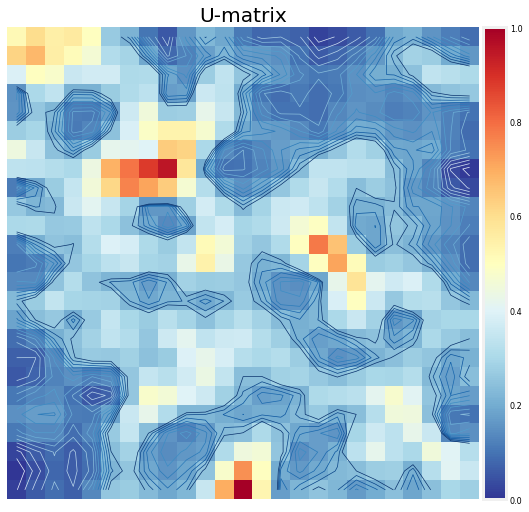

In [ ]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

#### b) Component Planes

C:\Users\Utilizador\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


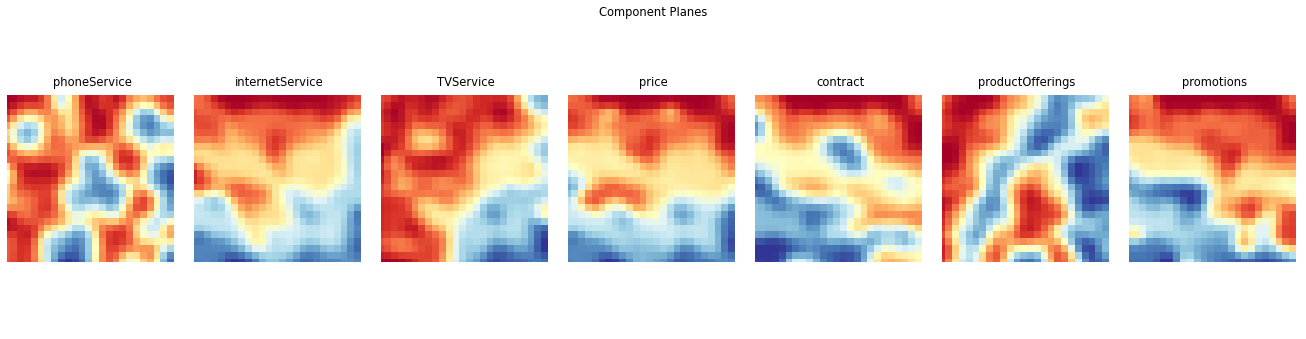

In [ ]:
som.component_names = data_prod_2.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)
comp_planes.show(som, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

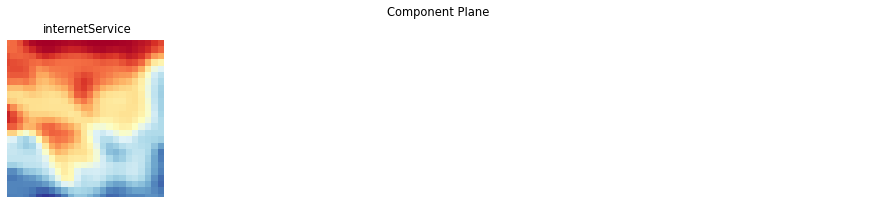

In [ ]:
# Para ver apenas o component plane de uma variável:
comp_plane = sompy.mapview.View2DPacked(rows, cols, 'Component Plane',text_size=8)
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
comp_plane.show(som, what='codebook', which_dim=[1], cmap=None, col_sz=5) #which_dim='all' default
# v.save('2d_packed_test')

In [ ]:
bmus = som.project_data(df_som_2)
bmus

array([360, 116, 614, ..., 492, 400, 550])

#### c) Option 1

In [ ]:
cl = som.cluster(n_clusters=2)

In [ ]:
labels = getattr(som, 'cluster_labels')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

C:\Users\Utilizador\anaconda3\lib\site-packages\sompy\visualization\mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


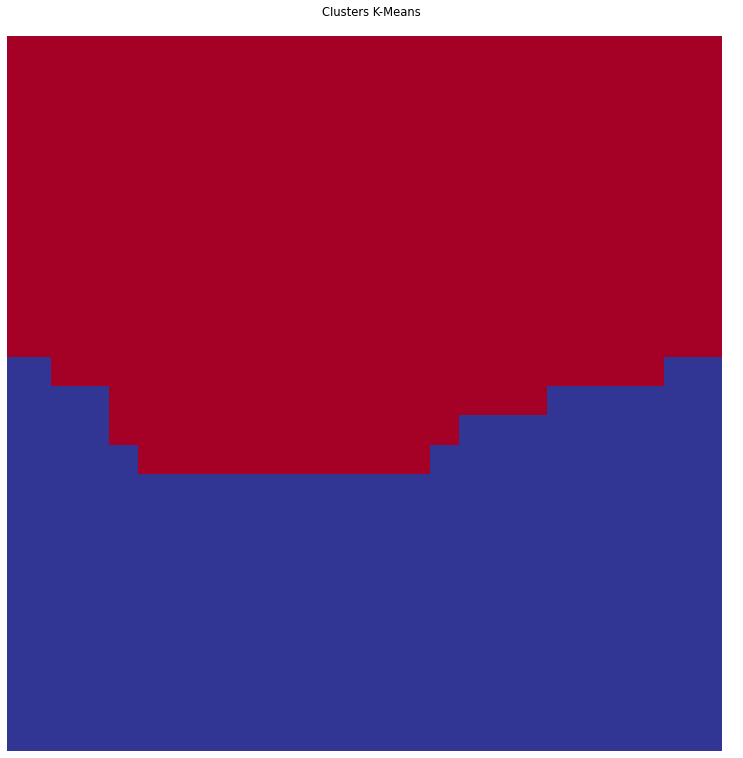

In [ ]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8)
v.show(som, what='cluster')

C:\Users\Utilizador\anaconda3\lib\site-packages\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


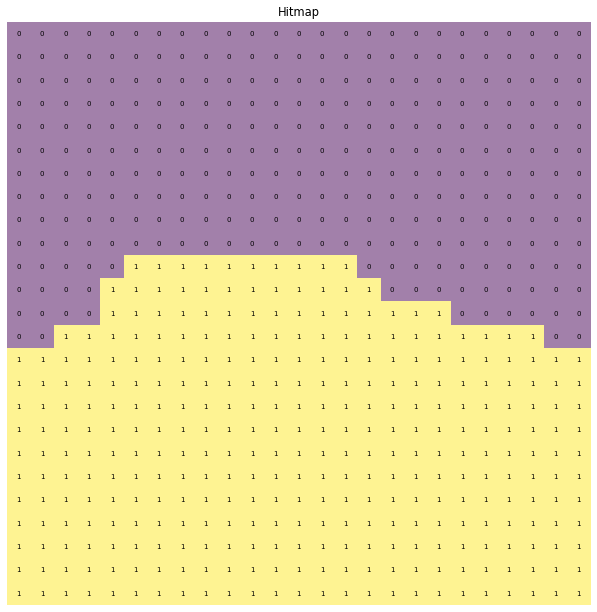

In [ ]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [ ]:
bmus = som.project_data(df_som_2)
data_prod_2['bmu'] = bmus

In [ ]:
data_prod_2['label_p'] = labels[data_prod_2['bmu']]
data_prod_2.head()

,phoneService,internetService,TVService,price,contract,productOfferings,promotions,bmu,label_p
customerID,,,,,,,,,
0,0.2,1.0,1.0,1.0,0.75,0.6,0.4,360,1
1,0.8,0.8,0.8,0.8,0.75,0.4,0.8,116,1
2,1.0,0.2,0.2,0.8,0.00,0.2,0.2,614,0
3,1.0,0.8,0.8,1.0,0.75,0.8,0.8,0,1
4,0.8,0.6,0.6,0.6,0.00,0.6,0.8,240,1


In [ ]:
df_final_som2 = data_prod_2.copy(deep=True)
df_final_som2['label_p'] = data_prod_2['label_p']

In [ ]:
descr_5 = df_final_som2.reset_index(drop=True)
descr_5 = descr_5.groupby(['label_p'])[['phoneService','internetService','TVService','price','contract', 'productOfferings', 'promotions']].describe().T
descr_5

label_p                            0             1
phoneService     count  11456.000000  12609.000000
                 mean       0.667039      0.729511
                 std        0.268262      0.243310
                 min        0.000000      0.000000
                 25%        0.400000      0.600000
                 50%        0.800000      0.800000
                 75%        0.800000      1.000000
                 max        1.000000      1.000000
internetService  count  11456.000000  12609.000000
                 mean       0.372381      0.749163
                 std        0.221731      0.190564
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.400000      0.800000
                 max        1.000000      1.000000
TVService        count  11456.000000  12609.000000
                 mean       0.577723      0.775747
                 std        0.295674      0.194822
                 min        0.000000      0.000000
                 25%        0.400000      0.600000
                 50%        0.600000      0.800000
                 75%        0.800000      1.000000
                 max        1.000000      1.000000
price            count  11456.000000  12609.000000
                 mean       0.346823      0.777175
                 std        0.206335      0.175451
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.400000      1.000000
                 max        1.000000      1.000000
contract         count  11456.000000  12609.000000
                 mean       0.300978      0.679713
                 std        0.273439      0.258139
                 min        0.000000      0.000000
                 25%        0.000000      0.500000
                 50%        0.250000      0.750000
                 75%        0.500000      1.000000
                 max        1.000000      1.000000
productOfferings count  11456.000000  12609.000000
                 mean       0.636016      0.667380
                 std        0.271089      0.256927
                 min        0.000000      0.000000
                 25%        0.400000      0.400000
                 50%        0.600000      0.600000
                 75%        0.800000      0.800000
                 max        1.000000      1.000000
promotions       count  11456.000000  12609.000000
                 mean       0.408659      0.765548
                 std        0.264405      0.228198
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.600000      1.000000
                 max        1.000000      1.000000

## 5.3. Mini Batch K-Means

### 5.3.1 Product Satisfaction

In [ ]:
data_prod_3 = data_prod.copy()

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

In [ ]:
clustering = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=100)

# Train model
model_mini_prod = clustering.fit(data_prod_3)

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [ ]:
data_prod_3['label_p'] = model_mini_prod.labels_
data_prod_3

,phoneService,internetService,TVService,price,contract,productOfferings,promotions,label_p
customerID,,,,,,,,
0,0.2,1.0,1.0,1.0,0.75,0.6,0.4,1
1,0.8,0.8,0.8,0.8,0.75,0.4,0.8,1
2,1.0,0.2,0.2,0.8,0.00,0.2,0.2,0
3,1.0,0.8,0.8,1.0,0.75,0.8,0.8,1
4,0.8,0.6,0.6,0.6,0.00,0.6,0.8,0
...,...,...,...,...,...,...,...,...
24060,0.6,0.6,0.6,0.6,0.50,0.6,0.6,1
24061,0.8,0.8,0.6,0.6,0.50,0.6,0.6,1
24062,1.0,0.4,0.4,0.4,0.50,0.6,0.4,0


In [ ]:
descr_6 = data_prod_3.groupby(['label_p']).describe().transpose()
descr_6

label_p                            0             1
phoneService     count  11208.000000  12857.000000
                 mean       0.668487      0.727044
                 std        0.268628      0.243925
                 min        0.000000      0.000000
                 25%        0.400000      0.600000
                 50%        0.800000      0.800000
                 75%        0.800000      1.000000
                 max        1.000000      1.000000
internetService  count  11208.000000  12857.000000
                 mean       0.364079      0.749133
                 std        0.211353      0.194177
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.400000      0.800000
                 max        1.000000      1.000000
TVService        count  11208.000000  12857.000000
                 mean       0.578283      0.771440
                 std        0.292745      0.203331
                 min        0.000000      0.000000
                 25%        0.400000      0.600000
                 50%        0.600000      0.800000
                 75%        0.800000      1.000000
                 max        1.000000      1.000000
price            count  11208.000000  12857.000000
                 mean       0.341417      0.773586
                 std        0.199216      0.181672
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.400000      1.000000
                 max        1.000000      1.000000
contract         count  11208.000000  12857.000000
                 mean       0.288834      0.682994
                 std        0.265907      0.254838
                 min        0.000000      0.000000
                 25%        0.000000      0.500000
                 50%        0.250000      0.750000
                 75%        0.500000      1.000000
                 max        1.000000      1.000000
productOfferings count  11208.000000  12857.000000
                 mean       0.627141      0.674512
                 std        0.270382      0.256717
                 min        0.000000      0.000000
                 25%        0.400000      0.400000
                 50%        0.600000      0.800000
                 75%        0.800000      0.800000
                 max        1.000000      1.000000
promotions       count  11208.000000  12857.000000
                 mean       0.396842      0.768966
                 std        0.260414      0.221843
                 min        0.000000      0.000000
                 25%        0.200000      0.600000
                 50%        0.400000      0.800000
                 75%        0.600000      1.000000
                 max        1.000000      1.000000

### 5.3.2 Customer Information

In [ ]:
data_cust_3 = data_cust.copy()

In [ ]:
clustering = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)

# Train model
model_mini_cust = clustering.fit(data_cust_3)

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [ ]:
data_cust_3['label_c'] = model_mini_cust.labels_
data_cust_3

,age,income,monthlyCharges,gender_Male,paperlessBilling_Yes,dependents_Yes,label_c
customerID,,,,,,,
0,0.283582,0.232565,0.000000,0.0,1.0,1.0,2
1,0.567164,0.544585,0.000000,0.0,1.0,0.0,1
2,0.388060,0.022329,0.000000,0.0,1.0,0.0,1
3,0.552239,0.039437,0.362783,1.0,1.0,0.0,0
4,0.164179,0.149340,0.671337,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...
24060,0.462687,0.138611,0.173516,0.0,1.0,0.0,1
24061,0.328358,0.382340,0.385853,1.0,1.0,0.0,0
24062,0.119403,0.324199,0.000000,1.0,0.0,0.0,0


In [ ]:
descr_7 = data_cust_3.groupby(['label_c']).describe().transpose()
descr_7

label_c                               0            1            2
age                  count  8521.000000  8908.000000  6636.000000
                     mean      0.337948     0.334923     0.382097
                     std       0.187973     0.189638     0.230724
                     min       0.000000     0.000000     0.000000
                     25%       0.179104     0.164179     0.179104
                     50%       0.328358     0.328358     0.388060
                     75%       0.477612     0.477612     0.582090
                     max       1.000000     1.000000     0.776119
income               count  8521.000000  8908.000000  6636.000000
                     mean      0.301407     0.283751     0.242231
                     std       0.153431     0.161399     0.123789
                     min       0.000000     0.000145     0.000000
                     25%       0.209076     0.174967     0.159308
                     50%       0.285921     0.274612     0.247934
                     75%       0.389300     0.377120     0.316514
                     max       0.945339     1.000000     0.949253
monthlyCharges       count  8521.000000  8908.000000  6636.000000
                     mean      0.129272     0.129942     0.122188
                     std       0.216687     0.214034     0.210469
                     min       0.000000     0.000000     0.000000
                     25%       0.000000     0.000000     0.000000
                     50%       0.000000     0.000000     0.000000
                     75%       0.186086     0.198270     0.173516
                     max       1.000000     1.000000     1.000000
gender_Male          count  8521.000000  8908.000000  6636.000000
                     mean      1.000000     0.000000     0.499849
                     std       0.000000     0.000000     0.500038
                     min       1.000000     0.000000     0.000000
                     25%       1.000000     0.000000     0.000000
                     50%       1.000000     0.000000     0.000000
                     75%       1.000000     0.000000     1.000000
                     max       1.000000     0.000000     1.000000
paperlessBilling_Yes count  8521.000000  8908.000000  6636.000000
                     mean      0.760357     0.726538     0.996233
                     std       0.426891     0.445761     0.061267
                     min       0.000000     0.000000     0.000000
                     25%       1.000000     0.000000     1.000000
                     50%       1.000000     1.000000     1.000000
                     75%       1.000000     1.000000     1.000000
                     max       1.000000     1.000000     1.000000
dependents_Yes       count  8521.000000  8908.000000  6636.000000
                     mean      0.000000     0.000000     1.000000
                     std       0.000000     0.000000     0.000000
                     min       0.000000     0.000000     1.000000
                     25%       0.000000     0.000000     1.000000
                     50%       0.000000     0.000000     1.000000
                     75%       0.000000     0.000000     1.000000
                     max       0.000000     0.000000     1.000000

## 5.4 BIRCH


In [ ]:
data_cust_4 = data_cust.copy()
data_prod_4 = data_prod.copy()

In [ ]:
from sklearn.cluster import Birch

### 5.4.1 Product Satisfaction

In [ ]:
model_birch_prod = Birch(threshold=0.5, n_clusters=2)
model_birch_prod.fit(data_prod_4)

Birch(n_clusters=2)

In [ ]:
data_prod_4['label_c'] = model_birch_prod.labels_
data_prod_4

,phoneService,internetService,TVService,price,contract,productOfferings,promotions,label_c
customerID,,,,,,,,
0,0.2,1.0,1.0,1.0,0.75,0.6,0.4,0
1,0.8,0.8,0.8,0.8,0.75,0.4,0.8,0
2,1.0,0.2,0.2,0.8,0.00,0.2,0.2,1
3,1.0,0.8,0.8,1.0,0.75,0.8,0.8,0
4,0.8,0.6,0.6,0.6,0.00,0.6,0.8,0
...,...,...,...,...,...,...,...,...
24060,0.6,0.6,0.6,0.6,0.50,0.6,0.6,0
24061,0.8,0.8,0.6,0.6,0.50,0.6,0.6,0
24062,1.0,0.4,0.4,0.4,0.50,0.6,0.4,0


In [ ]:
descr_8 = data_prod_4.groupby(['label_c']).describe().transpose()
descr_8

label_c                            0            1
phoneService     count  19630.000000  4435.000000
                 mean       0.726144     0.583044
                 std        0.246411     0.272083
                 min        0.000000     0.000000
                 25%        0.600000     0.400000
                 50%        0.800000     0.600000
                 75%        1.000000     0.800000
                 max        1.000000     1.000000
internetService  count  19630.000000  4435.000000
                 mean       0.637606     0.269673
                 std        0.250971     0.182123
                 min        0.000000     0.000000
                 25%        0.400000     0.200000
                 50%        0.600000     0.200000
                 75%        0.800000     0.400000
                 max        1.000000     1.000000
TVService        count  19630.000000  4435.000000
                 mean       0.755385     0.354363
                 std        0.210393     0.244324
                 min        0.000000     0.000000
                 25%        0.600000     0.200000
                 50%        0.800000     0.400000
                 75%        1.000000     0.400000
                 max        1.000000     1.000000
price            count  19630.000000  4435.000000
                 mean       0.643647     0.256550
                 std        0.257116     0.182535
                 min        0.000000     0.000000
                 25%        0.400000     0.200000
                 50%        0.600000     0.200000
                 75%        0.800000     0.400000
                 max        1.000000     1.000000
contract         count  19630.000000  4435.000000
                 mean       0.513971     0.435006
                 std        0.330328     0.297790
                 min        0.000000     0.000000
                 25%        0.250000     0.250000
                 50%        0.500000     0.500000
                 75%        0.750000     0.750000
                 max        1.000000     1.000000
productOfferings count  19630.000000  4435.000000
                 mean       0.674508     0.554814
                 std        0.255843     0.278271
                 min        0.000000     0.000000
                 25%        0.400000     0.400000
                 50%        0.800000     0.600000
                 75%        0.800000     0.800000
                 max        1.000000     1.000000
promotions       count  19630.000000  4435.000000
                 mean       0.619042     0.492131
                 std        0.291357     0.334916
                 min        0.000000     0.000000
                 25%        0.400000     0.200000
                 50%        0.600000     0.400000
                 75%        0.800000     0.800000
                 max        1.000000     1.000000

### 5.4.2 Customer Information

In [ ]:
model_birch_cust = Birch(threshold=0.01, n_clusters=3)
model_birch_cust.fit(data_cust_4)

Birch(threshold=0.01)

In [ ]:
data_cust_4['label_c'] = model_birch_cust.labels_
data_cust_4

,age,income,monthlyCharges,gender_Male,paperlessBilling_Yes,dependents_Yes,label_c
customerID,,,,,,,
0,0.283582,0.232565,0.000000,0.0,1.0,1.0,1
1,0.567164,0.544585,0.000000,0.0,1.0,0.0,0
2,0.388060,0.022329,0.000000,0.0,1.0,0.0,0
3,0.552239,0.039437,0.362783,1.0,1.0,0.0,0
4,0.164179,0.149340,0.671337,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...
24060,0.462687,0.138611,0.173516,0.0,1.0,0.0,0
24061,0.328358,0.382340,0.385853,1.0,1.0,0.0,0
24062,0.119403,0.324199,0.000000,1.0,0.0,0.0,2


In [ ]:
descr_9 = data_cust_4.groupby(['label_c']).describe().transpose()
descr_9

label_c                                0            1            2
age                  count  12951.000000  6636.000000  4478.000000
                     mean       0.384329     0.382097     0.197790
                     std        0.175460     0.230724     0.154549
                     min        0.000000     0.000000     0.000000
                     25%        0.253731     0.179104     0.089552
                     50%        0.388060     0.388060     0.134328
                     75%        0.507463     0.582090     0.283582
                     max        1.000000     0.776119     1.000000
income               count  12951.000000  6636.000000  4478.000000
                     mean       0.294972     0.242231     0.284896
                     std        0.175829     0.123789     0.086190
                     min        0.000000     0.000000     0.024503
                     25%        0.157315     0.159308     0.225750
                     50%        0.285051     0.247934     0.274467
                     75%        0.414746     0.316514     0.329274
                     max        1.000000     0.949253     0.802813
monthlyCharges       count  12951.000000  6636.000000  4478.000000
                     mean       0.128864     0.122188     0.131786
                     std        0.213931     0.210469     0.219334
                     min        0.000000     0.000000     0.000000
                     25%        0.000000     0.000000     0.000000
                     50%        0.000000     0.000000     0.000000
                     75%        0.186086     0.173516     0.198270
                     max        1.000000     1.000000     1.000000
gender_Male          count  12951.000000  6636.000000  4478.000000
                     mean       0.500270     0.499849     0.456007
                     std        0.500019     0.500038     0.498116
                     min        0.000000     0.000000     0.000000
                     25%        0.000000     0.000000     0.000000
                     50%        1.000000     0.000000     0.000000
                     75%        1.000000     1.000000     1.000000
                     max        1.000000     1.000000     1.000000
paperlessBilling_Yes count  12951.000000  6636.000000  4478.000000
                     mean       1.000000     0.996233     0.000000
                     std        0.000000     0.061267     0.000000
                     min        1.000000     0.000000     0.000000
                     25%        1.000000     1.000000     0.000000
                     50%        1.000000     1.000000     0.000000
                     75%        1.000000     1.000000     0.000000
                     max        1.000000     1.000000     0.000000
dependents_Yes       count  12951.000000  6636.000000  4478.000000
                     mean       0.000000     1.000000     0.000000
                     std        0.000000     0.000000     0.000000
                     min        0.000000     1.000000     0.000000
                     25%        0.000000     1.000000     0.000000
                     50%        0.000000     1.000000     0.000000
                     75%        0.000000     1.000000     0.000000
                     max        0.000000     1.000000     0.000000

## 5.5 DBSCAN

#### Product Satisfaction

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


#print("Estimated number of clusters: %d" % n_clusters_)
#print("Estimated number of noise points: %d" % n_noise_)


In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(data_prod)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [ ]:
print("Estimated number of clusters for product satisfaction: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters for product satisfaction: 7
Estimated number of noise points: 576


#### Customer Information

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(data_cust)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print("Estimated number of clusters for customer information: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

NameError: name 'n_clusters_' is not defined

# 6. Exploring the Results

#### Com base nos resultados anteriores:

In [ ]:
data_result=dummy.copy()

In [ ]:
data_result = pd.DataFrame(data_result, columns = minmax_data.columns, index=minmax_data.index)
data_result.head(10)

,age,income,monthlyCharges,phoneService,internetService,TVService,price,contract,productOfferings,promotions,gender_Male,paperlessBilling_Yes,dependents_Yes
customerID,,,,,,,,,,,,,
0,37,1655,2.995732,1,5,5,5,4,3,2,0,1,1
1,56,3807,2.995732,4,4,4,4,4,2,4,0,1,0
2,44,205,2.995732,5,1,1,4,1,1,1,0,1,0
3,55,323,3.912023,5,4,4,5,4,4,4,1,1,0
4,29,1081,4.691348,4,3,3,3,1,3,4,1,1,1
5,32,2439,2.995732,4,3,3,1,1,3,1,1,1,0
6,41,2162,2.995732,3,5,5,4,4,5,4,0,1,0
7,60,428,3.178054,3,4,4,4,4,4,4,0,1,0
8,26,4099,2.995732,5,1,4,1,1,5,1,0,1,1


In [ ]:
#Para product satisfaction - KMEANS apresenta mais variedade - data prod 1
data_result['label_p'] = list(data_prod_1['label_p'])
#Para customar information - BIRCH apresenta mais variedade - data cust 4
data_result['label_c'] = list(data_cust_4['label_c'])

In [ ]:
data_result

,age,income,monthlyCharges,phoneService,internetService,TVService,price,contract,productOfferings,promotions,gender_Male,paperlessBilling_Yes,dependents_Yes,label_p,label_c
customerID,,,,,,,,,,,,,,,
0,37,1655,2.995732,1,5,5,5,4,3,2,0,1,1,1,1
1,56,3807,2.995732,4,4,4,4,4,2,4,0,1,0,1,0
2,44,205,2.995732,5,1,1,4,1,1,1,0,1,0,0,0
3,55,323,3.912023,5,4,4,5,4,4,4,1,1,0,1,0
4,29,1081,4.691348,4,3,3,3,1,3,4,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24060,49,1007,3.433987,3,3,3,3,3,3,3,0,1,0,1,0
24061,40,2688,3.970292,4,4,3,3,3,3,3,1,1,0,1,0
24062,26,2287,2.995732,5,2,2,2,3,3,2,1,0,0,0,2


#### Substituir coluna monthly charges pela original

In [ ]:
#df a substituir : data_result
#df original: trainingcopy
data_RESULT=data_result.copy()
data_RESULT['monthlyCharges'] = data_result.replace(trainingcopy['monthlyCharges'])
data_RESULT

,age,income,monthlyCharges,phoneService,internetService,TVService,price,contract,productOfferings,promotions,gender_Male,paperlessBilling_Yes,dependents_Yes,label_p,label_c
customerID,,,,,,,,,,,,,,,
0,37,1655,20.0,1,5,5,5,4,3,2,0,1,1,1,1
1,56,3807,66.0,4,4,4,4,4,2,4,0,1,0,1,0
2,44,205,20.0,5,1,1,4,1,1,1,0,1,0,0,0
3,55,323,20.0,5,4,4,5,4,4,4,1,1,0,1,0
4,29,1081,20.0,4,3,3,3,1,3,4,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24060,49,1007,84.0,3,3,3,3,3,3,3,0,1,0,1,0
24061,40,2688,21.0,4,4,3,3,3,3,3,1,1,0,1,0
24062,26,2287,20.0,5,2,2,2,3,3,2,1,0,0,0,2


### 6.1 Customer Information Perspective

In [ ]:
centroid_0_age = data_RESULT[data_RESULT['label_c']==0]['age'].mean()
centroid_1_age= data_RESULT[data_RESULT['label_c']==1]['age'].mean()
centroid_2_age = data_RESULT[data_RESULT['label_c']==2]['age'].mean()

centroid_0_income= data_RESULT[data_RESULT['label_c']==0]['income'].mean()
centroid_1_income= data_RESULT[data_RESULT['label_c']==1]['income'].mean()
centroid_2_income = data_RESULT[data_RESULT['label_c']==2]['income'].mean()

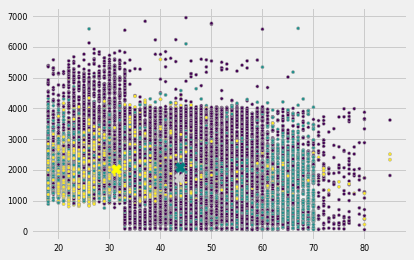

In [ ]:
#SCATTERPLOT
plt.scatter(data_RESULT.age , data_RESULT.income, c=data_RESULT.label_c, s=10, edgecolors='darkgrey')
plt.scatter(centroid_0_age , centroid_0_income, marker='X', s=100, c='teal')
plt.scatter(centroid_1_age , centroid_1_income, marker='X', s=100, c='lightgrey')
plt.scatter(centroid_2_age , centroid_2_income, marker='X', s=100, c='yellow')

plt.show()

<AxesSubplot:xlabel='label_c', ylabel='income'>

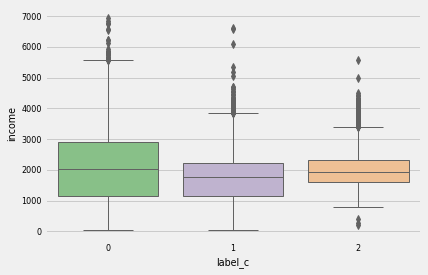

In [ ]:
sns.boxplot(x = 'label_c', y = 'income', data = data_RESULT, palette='Accent', linewidth=1)
           # order=['0','1','2'], palette='bone')

<AxesSubplot:xlabel='label_c', ylabel='age'>

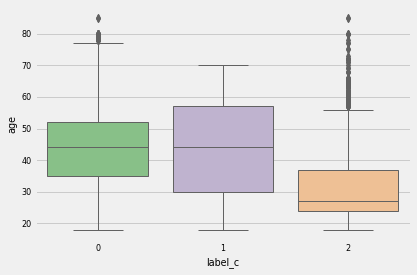

In [ ]:
sns.boxplot(x = 'label_c', y = 'age', data = data_RESULT, palette='Accent', linewidth=1)

### 6.2 Product Satisfaction Perspective

<AxesSubplot:xlabel='count', ylabel='internetService'>

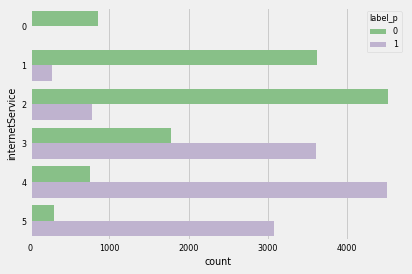

In [ ]:
sns.countplot(y = 'internetService', hue = 'label_p', data = data_RESULT, palette='Accent')

<AxesSubplot:xlabel='count', ylabel='price'>

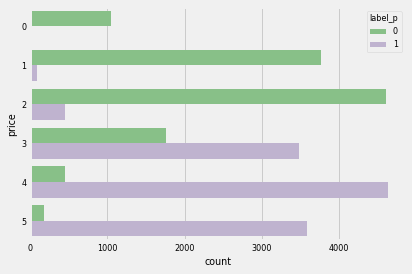

In [ ]:
sns.countplot(y = 'price', hue = 'label_p', data = data_RESULT, palette='Accent')

<AxesSubplot:xlabel='count', ylabel='promotions'>

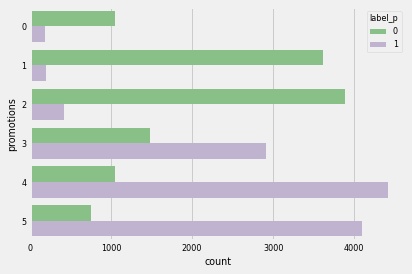

In [ ]:
sns.countplot(y = 'promotions', hue = 'label_p', data = data_RESULT, palette='Accent')

<AxesSubplot:xlabel='count', ylabel='contract'>

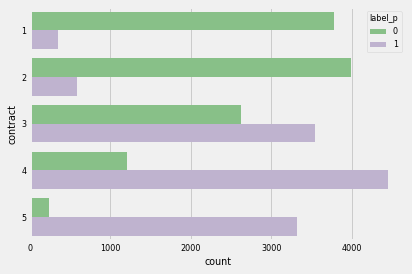

In [ ]:
sns.countplot(y = 'contract', hue = 'label_p', data = data_RESULT, palette='Accent')

<AxesSubplot:xlabel='count', ylabel='productOfferings'>

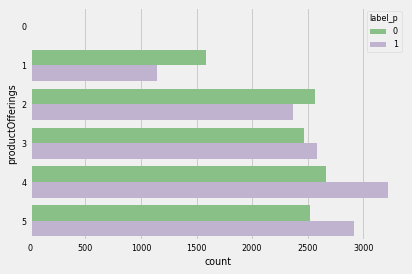

In [ ]:
sns.countplot(y = 'productOfferings', hue = 'label_p', data = data_RESULT, palette='Accent')

<AxesSubplot:xlabel='count', ylabel='TVService'>

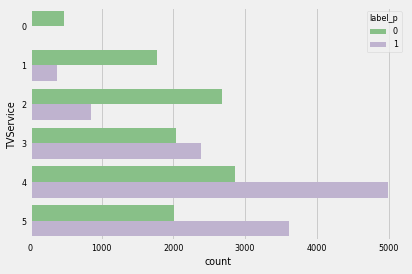

In [ ]:
sns.countplot(y = 'TVService', hue = 'label_p', data = data_RESULT, palette='Accent')

<AxesSubplot:xlabel='count', ylabel='phoneService'>

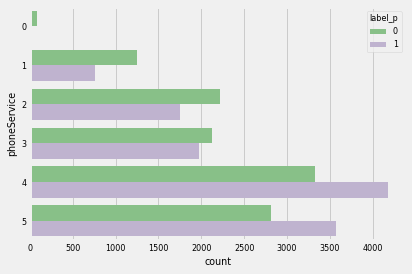

In [ ]:
sns.countplot(y = 'phoneService', hue = 'label_p', data = data_RESULT, palette='Accent')

# 7. Join Perspectives


In [ ]:
describ = data_RESULT.reset_index(drop=True)
describ = describ.groupby(['label_p', 'label_c'])[['phoneService','internetService','price','contract','productOfferings','promotions']].agg(['mean'])
describ

phoneService internetService     price  contract  \
                        mean            mean      mean      mean   
label_p label_c                                                    
0       0           3.425398        1.897381  1.764257  1.812168   
        1           3.320013        1.863939  1.665398  2.348557   
        2           3.153293        1.975019  1.942089  2.763437   
1       0           3.699812        3.725972  3.993207  4.069663   
        1           3.718346        3.780936  3.755670  3.527993   
        2           3.370915        3.851852  3.882898  3.298475   

                productOfferings promotions  
                            mean       mean  
label_p label_c                              
0       0               3.256963   1.743700  
        1               3.121789   2.775135  
        2               2.994322   1.707419  
1       0               3.453823   4.008094  
        1               3.293138   3.998852  
        2               3.125817   3.394880

In [ ]:
describ = data_RESULT.reset_index(drop=True)
describ = describ.groupby(['label_p', 'label_c'])[['age', 'income', 'monthlyCharges', 'gender_Male', 'paperlessBilling_Yes', 'dependents_Yes']].agg(['mean'])
describ

age       income monthlyCharges gender_Male  \
                      mean         mean           mean        mean   
label_p label_c                                                      
0       0        43.528183  2093.200763      53.695458    0.497513   
        1        43.747542  1787.889629      42.818268    0.615287   
        2        31.180545  2005.211961      32.622256    0.451552   
1       0        43.943489  2078.636942      53.727706    0.502674   
        1        43.467413  1661.714040      43.253517    0.395349   
        2        31.354575  2031.350763      35.827342    0.462418   

                paperlessBilling_Yes dependents_Yes  
                                mean           mean  
label_p label_c                                      
0       0                   1.000000              0  
        1                   0.997463              1  
        2                   0.000000              0  
1       0                   1.000000              0  
        1                   0.995119              1  
        2                   0.000000              0

In [ ]:
last_result=data_RESULT.copy()
last_result['final_label'] = data_RESULT['label_p'].astype(str) + data_RESULT['label_c'].astype(str)
last_result

,age,income,monthlyCharges,phoneService,internetService,TVService,price,contract,productOfferings,promotions,gender_Male,paperlessBilling_Yes,dependents_Yes,label_p,label_c,final_label
customerID,,,,,,,,,,,,,,,,
0,37,1655,20.0,1,5,5,5,4,3,2,0,1,1,1,1,11
1,56,3807,66.0,4,4,4,4,4,2,4,0,1,0,1,0,10
2,44,205,20.0,5,1,1,4,1,1,1,0,1,0,0,0,00
3,55,323,20.0,5,4,4,5,4,4,4,1,1,0,1,0,10
4,29,1081,20.0,4,3,3,3,1,3,4,1,1,1,0,1,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24060,49,1007,84.0,3,3,3,3,3,3,3,0,1,0,1,0,10
24061,40,2688,21.0,4,4,3,3,3,3,3,1,1,0,1,0,10
24062,26,2287,20.0,5,2,2,2,3,3,2,1,0,0,0,2,02


###  VISUALIZATIONS


In [ ]:
cluster00 = last_result[last_result.final_label=='00']
cluster01 = last_result[last_result.final_label=='01']
cluster02 = last_result[last_result.final_label=='02']
cluster10 = last_result[last_result.final_label=='10']
cluster11 = last_result[last_result.final_label=='11']
cluster12 = last_result[last_result.final_label=='12']

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


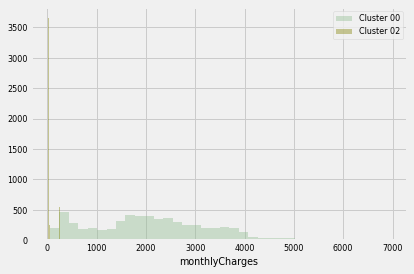

In [ ]:
sns.distplot(cluster00['income'],color='darkseagreen',label='Cluster 00', kde = False)
#sns.distplot(cluster01['age'],color='goldenrod',label='Cluster 01', kde = False)
sns.distplot(cluster00['monthlyCharges'],color='olive',label='Cluster 02', kde = False)

plt.legend()

<AxesSubplot:xlabel='final_label', ylabel='age'>

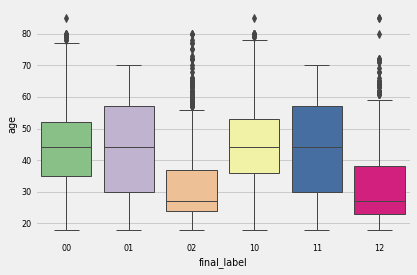

In [ ]:
sns.boxplot(x = 'final_label', y = 'age', data = last_result,
            order=['00','01','02','10','11','12'], palette='Accent', linewidth=1)

<AxesSubplot:xlabel='final_label', ylabel='income'>

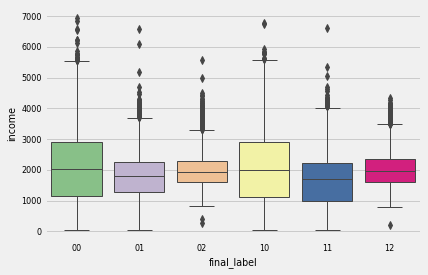

In [ ]:
sns.boxplot(x = 'final_label', y = 'income', data = last_result,
            order=['00','01','02','10','11','12'], palette='Accent', linewidth=1)

## 8. Cluster Evaluation

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
def silhouette(X, algorithm):
    range_n_clusters = [2, 3, 4, 5, 6]
    silhouette_scores =[]

    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    return silhouette_scores

### 8.1 Product Satisfaction

#### KMEANS:

In [ ]:
X = data_prod_1.iloc[:,1:-1].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.29029421805062605
For n_clusters = 3 The average silhouette_score is : 0.26240603922280037
For n_clusters = 4 The average silhouette_score is : 0.21955984618498123
For n_clusters = 5 The average silhouette_score is : 0.2157729463764564
For n_clusters = 6 The average silhouette_score is : 0.21553982358993212


In [ ]:
def draw_silhouette(silhouette_scores):
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(5, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

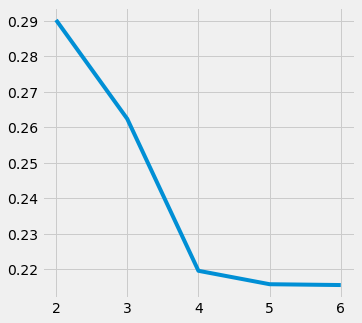

In [ ]:
draw_silhouette(k_means_silhouette)

#### BIRCH:

In [ ]:
X = data_prod_4.iloc[:,1:-1].values

birch_silhouette = silhouette(X, Birch)

For n_clusters = 2 The average silhouette_score is : 0.19350228893789995
For n_clusters = 3 The average silhouette_score is : 0.22355860618139167
For n_clusters = 4 The average silhouette_score is : 0.20875727905551214
For n_clusters = 5 The average silhouette_score is : 0.18136871195476634
For n_clusters = 6 The average silhouette_score is : 0.1791877072214733


In [ ]:
def draw_silhouette(silhouette_scores):
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(5, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

In [ ]:
draw_silhouette(birch_silhouette)

#### MiniBatch KMeans:

In [ ]:
X = data_prod_3.iloc[:,1:-1].values

minibatch_silhouette = silhouette(X, MiniBatchKMeans)

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.2906289468336331


C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.24381993081211636


C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.21018131541014592


C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.19735099311817209


C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.20069238158666147


### 8.2. Customer Information

In [ ]:
X = data_cust_4.iloc[:,1:-1].values

birch_silhouette = silhouette(X, Birch)

For n_clusters = 2 The average silhouette_score is : 0.3787974008666949
For n_clusters = 3 The average silhouette_score is : 0.49101836667815996
For n_clusters = 4 The average silhouette_score is : 0.5227762342187657
For n_clusters = 5 The average silhouette_score is : 0.6161532642512371
For n_clusters = 6 The average silhouette_score is : 0.72374955104946


In [ ]:
def draw_silhouette(silhouette_scores):
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(5, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

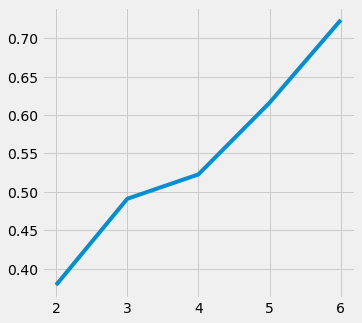

In [ ]:
draw_silhouette(birch_silhouette)